In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro, kstest, zscore
import statsmodels.api as sm

In [2]:
df_dados = pd.read_csv('./datasets/dados_de_irrigacao.csv')

In [3]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [5]:
df_dados.head(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [6]:
df_dados.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


In [10]:
print(df_dados.columns)

Index(['Horas de Irrigação', 'Área Irrigada', 'Área Irrigada por Ângulo'], dtype='object')


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

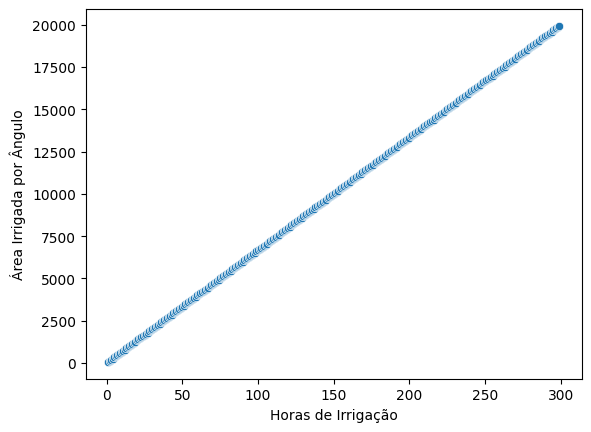

In [17]:
sns.scatterplot(data=df_dados, x='Horas de Irrigação', y='Área Irrigada por Ângulo')

<Axes: ylabel='Horas de Irrigação'>

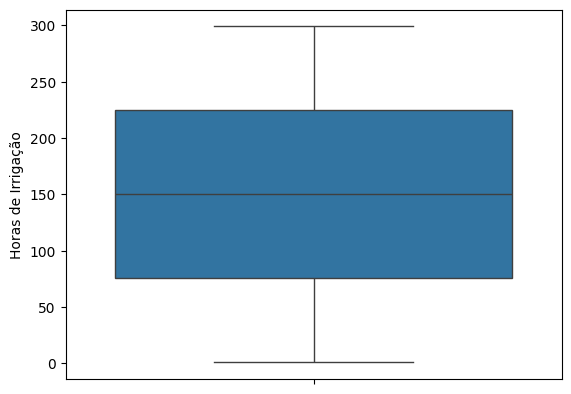

In [18]:
sns.boxplot(df_dados, y='Horas de Irrigação')

<Axes: ylabel='Área Irrigada por Ângulo'>

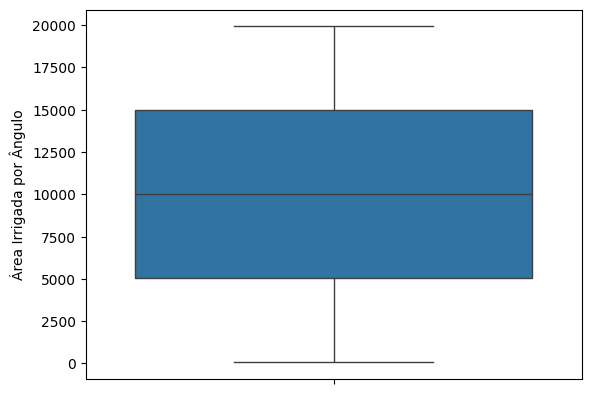

In [19]:
sns.boxplot(df_dados, y='Área Irrigada por Ângulo')

<Axes: >

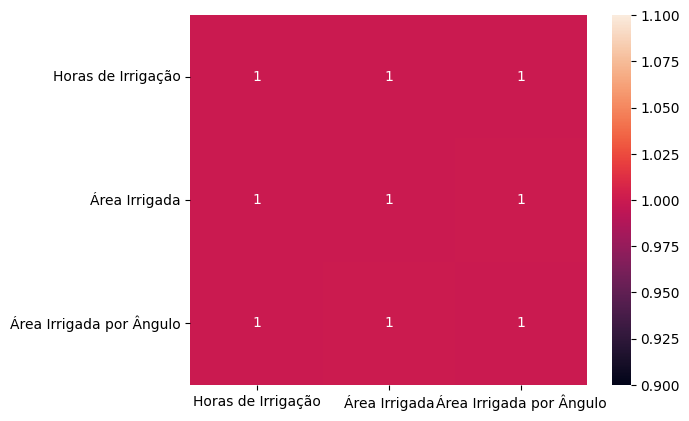

In [56]:
sns.heatmap(df_dados.corr(), annot=True)

<Axes: >

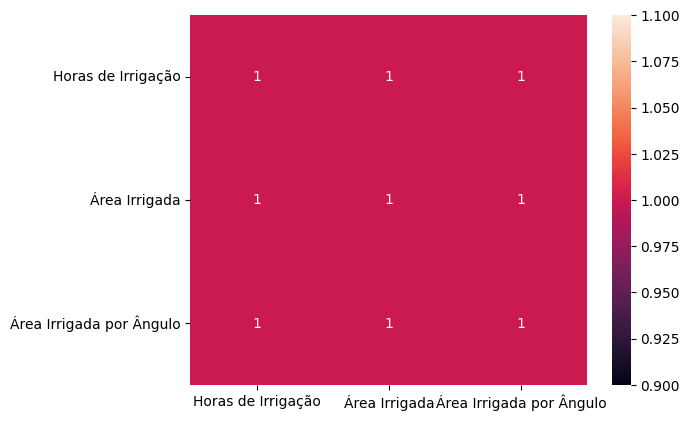

In [57]:
sns.heatmap(df_dados.corr('spearman'), annot=True)

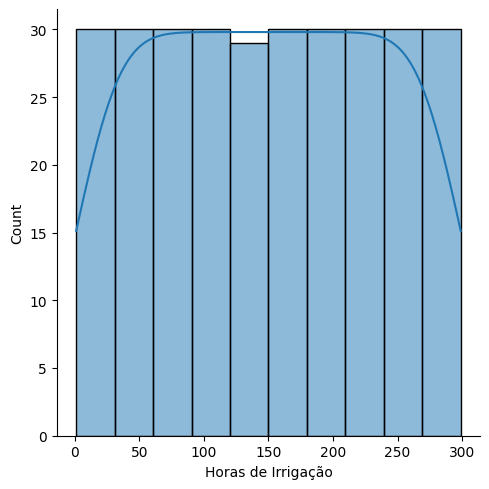

In [58]:
sns.displot(df_dados['Horas de Irrigação'], kde=True)

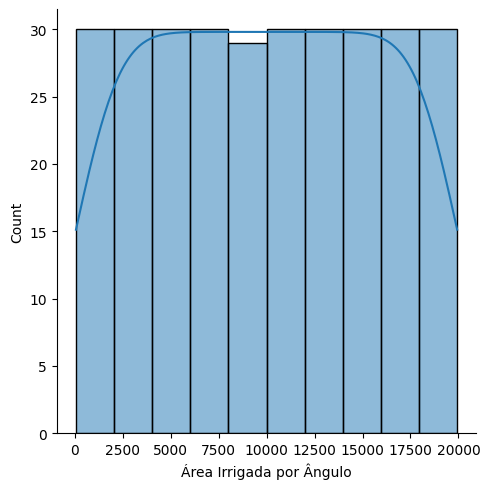

In [59]:
sns.displot(df_dados['Área Irrigada por Ângulo'], kde=True)

## Treino e Testes

In [60]:
X = df_dados['Horas de Irrigação'].values.reshape(-1, 1)
y = df_dados['Área Irrigada por Ângulo'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [61]:
reg_model = LinearRegression()

In [62]:
reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
print("Equação da reta: y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

Equação da reta: y = 66.666667x + 0.000000


## Valida modelos e métricas

In [64]:
y_pred = reg_model.predict(X_test)

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

1.0

In [66]:
mean_absolute_error(y_test, y_pred)

1.8764644159495625e-12

In [67]:
mean_squared_error(y_test, y_pred)

5.0788674199138044e-24

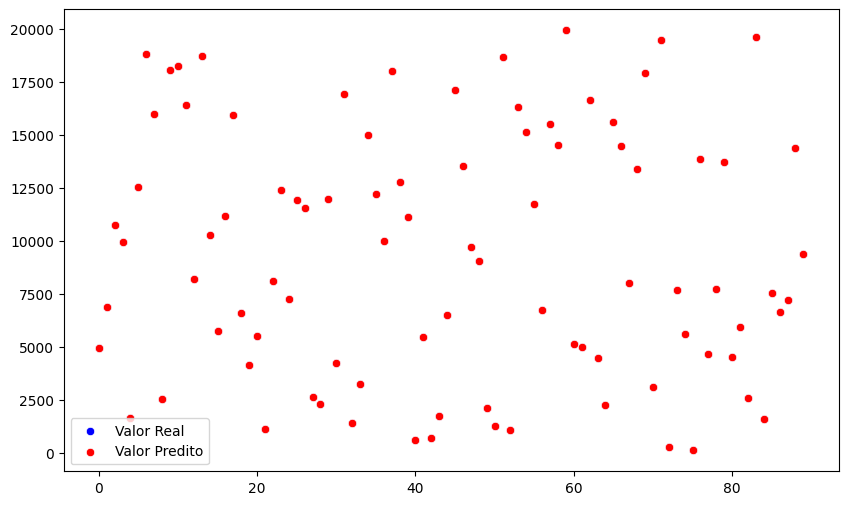

In [68]:
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valor Real')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valor Predito')
plt.legend()
plt.show()

## Análise de resíduos

In [69]:
residuos = y_test - y_pred

In [70]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - media) / desvio padrão
from scipy.stats import zscore
residuos_padronizados = zscore(residuos)

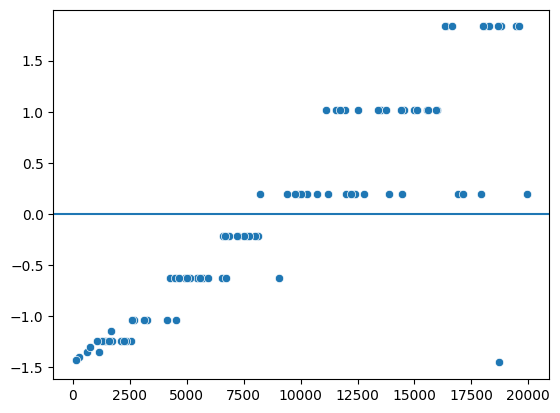

In [71]:
# Verificar linearidade do modelo:
# Se os resíduos estiver entre -2 e +2 (na escala padrão) - indica linearidade

# Verificar homogeneidade das variâncias (Homocedasticidade)
# valores estiver em torno da reta, temos homocedasticidade, caso contrário se tivermos alguma tendência ou padrão, há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_padronizados.reshape(-1))
plt.axhline(y=0)

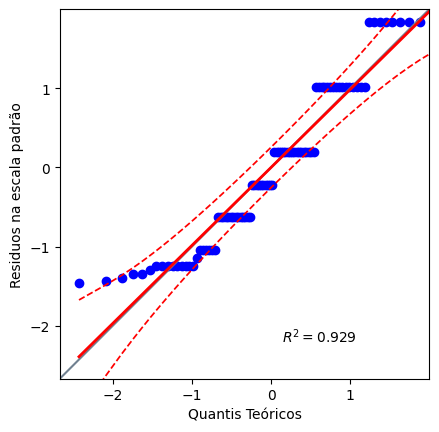

In [73]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile Plot) que avalia de uma amostra segue uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_padronizados, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()